In [22]:
import pandas as pd
import jovian
import opendatasets as od
import numpy as np
# !pip install jovian opendatasets --quiet

# Downloading the Dataset

In [23]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshitkamboj
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:11<00:00, 140MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [13]:
data_dir = 'new-york-city-taxi-fare-prediction'

# Viewing Dataset Files

In [24]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Feb  4 06:40 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Feb  4 06:40 sample_submission.csv
-rw-r--r-- 1 root root 960K Feb  4 06:40 test.csv
-rw-r--r-- 1 root root 5.4G Feb  4 06:41 train.csv


In [25]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [26]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [27]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

In [ ]:
!head {data_dir}/test.csv

In [ ]:
!head {data_dir}/sample_submission.csv

# Loading Training Dataset

In [15]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [17]:
dtypes = {
     'fare_amount': 'float32',
     'pickup_longitude': 'float32',
     'pickup_latitude': 'float32',
     'dropoff_longitude': 'float32',
     'dropoff_latitude': 'float32',
     'passenger_count': 'uint8'
}


In [28]:
import random

sample_fraction = 0.01

def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_fraction

random.seed(42)

df = pd.read_csv(data_dir+'/train.csv',
            usecols = selected_cols,
            parse_dates = ['pickup_datetime'],
            dtype = dtypes,
            skiprows = skip_row)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


# Loading Test Dataset

In [29]:
test_df = pd.read_csv(data_dir + '/test.csv',
                      dtype = dtypes,
                      parse_dates = ['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


# Exploring the Dataset

## Training Dataset

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

## Test Dataset

In [ ]:
test_df.info()

In [ ]:
test_df.describe()

In [ ]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

# Splitting the Dataset into Training and Validation Sets

In [7]:
from sklearn.model_selection import train_test_split

In [30]:
train_df, val_df = train_test_split(df,
                                    test_size = 0.2,
                                    random_state = 42
                                    )

In [ ]:
len(train_df), len(val_df)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [ ]:
train_df.columns

## Selecting Input and Target Columns

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [ ]:
target_col = ['fare_amount']

In [ ]:
train_inputs = train_df[input_cols]

In [ ]:
train_targets = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]
test_inputs

# Training and Evaluating Hardcoded Model

## Training

In [ ]:
import numpy as np

In [ ]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)
mean_model.mean

In [ ]:
train_preds = mean_model.predict(train_inputs)
train_preds

In [ ]:
val_preds = mean_model.predict(val_inputs)
val_preds

## Evaluating

In [63]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(targets, preds):
  return mean_squared_error(targets, preds, squared = False)

In [ ]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

In [ ]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

# Training and Evaluating Baseline Model

## Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(train_inputs, train_targets)

In [ ]:
train_preds = linear_model.predict(train_inputs)
train_preds

In [ ]:
val_preds = linear_model.predict(val_inputs)
val_preds

## Evaluating

In [ ]:
rmse(train_targets, train_preds)

In [ ]:
rmse(val_targets, val_preds)

# Making Predictions and Submitting the Results to Kaggle Competition

In [ ]:
test_preds = linear_model.predict(test_inputs)
test_preds

In [ ]:
sub_df = pd.read_csv(data_dir + '/sample_submission.csv')
sub_df

In [ ]:
sub_df['fare_amount'] = test_preds
sub_df

In [ ]:
sub_df.to_csv('linear_model_submission.csv', index = None)

In [65]:
def predict_and_submit(model, test_inputs, fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv(data_dir + '/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index = None)
  return sub_df

In [ ]:
predict_and_submit(linear_model, test_inputs, 'linear_sub2.csv')

# Feature Engineering

In [19]:
def add_dateparts(df, col):
  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day
  df[col + '_weekday'] = df[col].dt.weekday
  df[col + '_hour'] = df[col].dt.hour

In [22]:
add_dateparts(train_df, 'pickup_datetime')

In [23]:
add_dateparts(val_df, 'pickup_datetime')

In [26]:
add_dateparts(test_df, 'pickup_datetime')

In [32]:
def haversine_np(lon1, lat1, lon2, lat2):

  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c
  return km

In [29]:
def add_trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                     df['pickup_latitude'],
                                     df['dropoff_longitude'],
                                     df['dropoff_latitude'])

In [30]:
add_trip_distance(train_df)

In [31]:
add_trip_distance(val_df)
add_trip_distance(test_df)

## Adding Distance between Drop Off Location and Various Special Locations

In [1]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [2]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [4]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), 
               ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [33]:
add_landmarks(train_df)
add_landmarks(val_df)
add_landmarks(test_df)

# Removing Outliers According to the Test Dataset

In [34]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354463,-72.288383,39.830513,-72.295395,39.854305,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [35]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751553,1.671273,20.916758,9.675153,18.546644,4.512908,6.037651
std,0.042799,0.033542,0.039093,0.035436,1.278747,3.303940,3.295646,4.035816,4.018422,4.252535
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,134.497726,126.062576,149.400787,130.347153,138.619492


In [36]:
def remove_outliers(df):
  return df[(df['fare_amount'] >= 1.) &
            (df['fare_amount'] <= 500.) &
            (df['pickup_longitude'] >= -75) &
            (df['pickup_longitude'] <= -72) &
            (df['dropoff_longitude'] >= -75) &
            (df['dropoff_longitude'] <= -72) &
            (df['pickup_latitude'] >= 40) &
            (df['pickup_latitude'] <= 42) &
            (df['dropoff_latitude'] >= 40) &
            (df['dropoff_latitude'] <= 42) &
            (df['passenger_count'] >= 1) &
            (df['passenger_count'] <= 6)]

In [40]:
remove_outliers(train_df).shape

(431098, 12)

In [41]:
train_df.shape

(441960, 12)

In [42]:
val_df.shape

(110490, 12)

In [45]:
remove_outliers(val_df).shape

(107742, 12)

In [44]:
val_df.shape

(110490, 12)

In [46]:
train_df2 = remove_outliers(train_df).copy()
val_df2 = remove_outliers(val_df).copy()

# Saving the Processed Datasets in Parquet Format

In [49]:
train_df2.to_parquet('train2.parquet')
val_df2.to_parquet('val2.parquet')

# Training and Evaluating Different Models

## Split Inputs and Targets

In [50]:
train_df2.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [51]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [52]:
target_col = 'fare_amount'

In [53]:
train_inputs = train_df2[input_cols]
train_targets = train_df2[target_col]

In [54]:
val_inputs = val_df2[input_cols]
val_targets = val_df2[target_col]

In [55]:
test_inputs = test_df[input_cols]

## Function to Evaluate Different Models

In [57]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
  val_preds = model.predict(val_inputs)
  val_rmse = mean_squared_error(val_targets, val_preds, squared = False)
  return train_rmse, val_rmse, train_preds, val_preds

## Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

In [68]:
model1 = Ridge(random_state = 42)

In [69]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [70]:
evaluate(model1)

(7.1984396,
 7.346891,
 array([ 8.66626 ,  9.572266,  8.482666, ...,  8.497803, 10.186768,
        10.076172], dtype=float32),
 array([ 7.378418 ,  9.858887 , 34.795166 , ...,  8.4140625, 23.177734 ,
         8.386719 ], dtype=float32))

In [66]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.045654
1,2015-01-27 13:08:24.0000003,11.387695
2,2011-10-08 11:53:44.0000002,8.864258
3,2012-12-01 21:12:12.0000002,8.708252
4,2012-12-01 21:12:12.0000003,8.540039
...,...,...
9909,2015-05-10 12:37:51.0000002,6.912109
9910,2015-01-12 17:05:51.0000001,7.669678
9911,2015-04-19 20:44:15.0000001,35.532471
9912,2015-01-31 01:05:19.0000005,14.983887


## Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model2 = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 10, n_estimators = 100)

In [72]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 10min 32s, sys: 464 ms, total: 10min 32s
Wall time: 5min 59s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [73]:
evaluate(model2)

(4.570669377440414,
 5.100237251531351,
 array([8.24353122, 9.54701663, 8.24353122, ..., 9.16222157, 8.24353122,
        8.56125449]),
 array([ 8.24353122,  8.24353122, 51.25137869, ...,  8.24353122,
        32.18718917,  8.24353122]))

In [74]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.243531
1,2015-01-27 13:08:24.0000003,9.050770
2,2011-10-08 11:53:44.0000002,8.243531
3,2012-12-01 21:12:12.0000002,8.243531
4,2012-12-01 21:12:12.0000003,8.243531
...,...,...
9909,2015-05-10 12:37:51.0000002,8.260899
9910,2015-01-12 17:05:51.0000001,8.768155
9911,2015-04-19 20:44:15.0000001,50.129236
9912,2015-01-31 01:05:19.0000005,19.595493


## Gradient Boosting Model

In [75]:
from xgboost import XGBRegressor

In [76]:
model3 = XGBRegressor(max_depth = 5, objective = 'reg:squarederror', n_estimators = 200, 
                      random_state = 42, n_jobs = -1)

In [77]:
model3.fit(train_inputs, train_targets)

XGBRegressor(max_depth=5, n_estimators=200, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

In [78]:
evaluate(model3)

(3.9326959,
 4.5138993,
 array([ 6.965658 ,  6.2937975,  8.895641 , ..., 11.813512 ,  8.701773 ,
         9.023128 ], dtype=float32),
 array([ 9.771729 ,  6.9584937, 51.62848  , ...,  8.787841 , 32.331444 ,
         6.3938847], dtype=float32))

In [79]:
predict_and_submit(model3, test_inputs, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.366590
1,2015-01-27 13:08:24.0000003,7.789332
2,2011-10-08 11:53:44.0000002,6.945330
3,2012-12-01 21:12:12.0000002,8.002763
4,2012-12-01 21:12:12.0000003,14.809010
...,...,...
9909,2015-05-10 12:37:51.0000002,8.919188
9910,2015-01-12 17:05:51.0000001,8.851419
9911,2015-04-19 20:44:15.0000001,52.271629
9912,2015-01-31 01:05:19.0000005,18.777485


# Hyperparameter Tuning

In [80]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
  model = ModelClass(**params).fit(train_inputs, train_targets)
  train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared = False)
  val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared = False)
  return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
  train_errors, val_errors = [], []
  for value in param_values:
    params = dict(other_params)
    params[param_name] = value
    train_rmse, val_rmse = test_params(ModelClass, **params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

  plt.figure(figsize = (10, 6))
  plt.title('Overfitting Curve: ' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

In [85]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate': 0.05
}

## Number of Estimators

CPU times: user 4min 18s, sys: 477 ms, total: 4min 18s
Wall time: 2min 41s


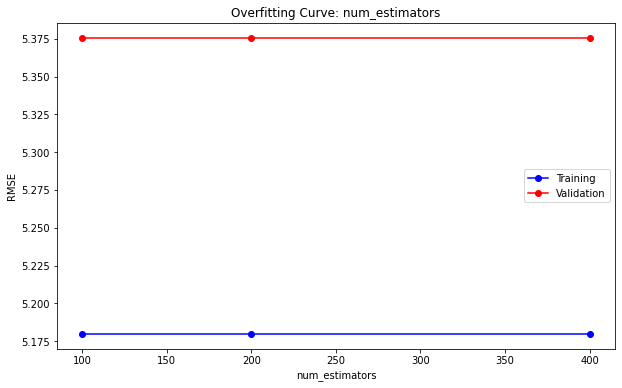

In [86]:
%%time
test_param_and_plot(XGBRegressor, 'num_estimators', [100, 200, 400], **best_params)

In [87]:
best_params['n_estimators'] = 100

## Maximum Depth

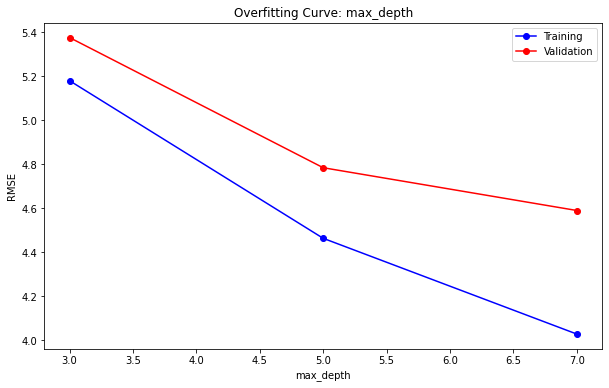

In [88]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [89]:
best_params['max_depth'] = 7

## Learning Rate

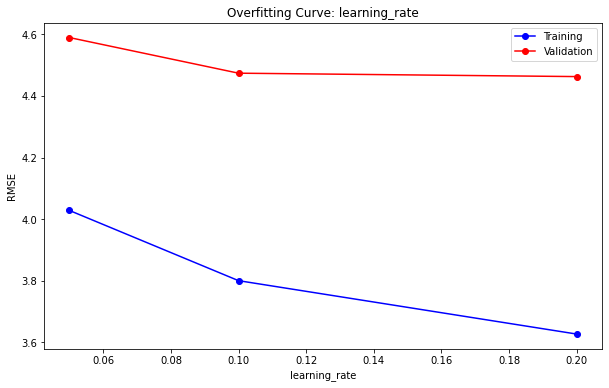

In [91]:
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.2], **best_params)

In [92]:
best_params['learning_rate'] = 0.10

## Final XGB Model

In [93]:
xgb_model_final = XGBRegressor(objective = 'reg:squarederror',
                               n_jobs = -1,
                               random_state = 42,
                               n_estimators = 500,
                               max_depth = 8,
                               learning_rate = 0.08,
                               subsample = 0.7,
                               colsample_bytree = 0.7)

In [94]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.08, max_depth=8,
             n_estimators=500, n_jobs=-1, objective='reg:squarederror',
             random_state=42, subsample=0.7)

In [95]:
evaluate(xgb_model_final)

(3.3659449,
 4.4378138,
 array([ 6.913305,  5.938088,  8.358995, ..., 11.653011,  9.287048,
         8.26404 ], dtype=float32),
 array([11.782173 ,  6.5212097, 52.999256 , ...,  8.862248 , 31.925188 ,
         6.6546893], dtype=float32))

In [96]:
predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,7.973005
1,2015-01-27 13:08:24.0000003,8.478524
2,2011-10-08 11:53:44.0000002,6.173661
3,2012-12-01 21:12:12.0000002,7.549339
4,2012-12-01 21:12:12.0000003,15.954003
...,...,...
9909,2015-05-10 12:37:51.0000002,8.672529
9910,2015-01-12 17:05:51.0000001,8.978641
9911,2015-04-19 20:44:15.0000001,55.120808
9912,2015-01-31 01:05:19.0000005,18.878916
